In [4]:
### Set working directory:
setwd("G:\\My Drive\\SDM_China")
### Load libraries
library(rstan)
library(rgdal)
### Define the path in which to save models:
### Define the model to run
mname<-'parabolic_simple_iCAR'
path2model<-paste('outputs\\models\\',mname,'.rds',sep="")

In [5]:
path2model

[1] "outputs\\models\\parabolic_simple_iCAR.rds"

In [6]:
readRDS(path2model)

ERROR: Error in readRDS(path2model): cannot read workspace version 3 written by R 3.6.1; need R 3.5.0 or newer


In [37]:
fit

Inference for Stan model: parabolic_simple_iCAR.
1 chains, each with iter=500; warmup=100; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=400.

              mean se_mean    sd     2.5%      25%      50%      75%    97.5%
alpha        -7.82    0.04  0.18    -8.14    -7.96    -7.83    -7.70    -7.49
beta1         0.31    0.03  0.44    -0.62     0.01     0.32     0.63     1.12
beta2         0.04    0.01  0.11    -0.16    -0.04     0.04     0.12     0.25
beta3         0.90    0.05  0.65    -0.28     0.49     0.85     1.34     2.23
beta4        -1.30    0.02  0.15    -1.58    -1.40    -1.31    -1.19    -1.03
beta5        -0.83    0.08  0.26    -1.38    -1.00    -0.79    -0.65    -0.36
beta6        -0.03    0.01  0.07    -0.18    -0.08    -0.02     0.02     0.12
beta7        -0.39    0.04  0.52    -1.33    -0.76    -0.43     0.00     0.68
beta8         0.23    0.02  0.16    -0.05     0.12     0.24     0.34     0.54
beta9         1.96    0.04  0.18     1.64     1.84     1.

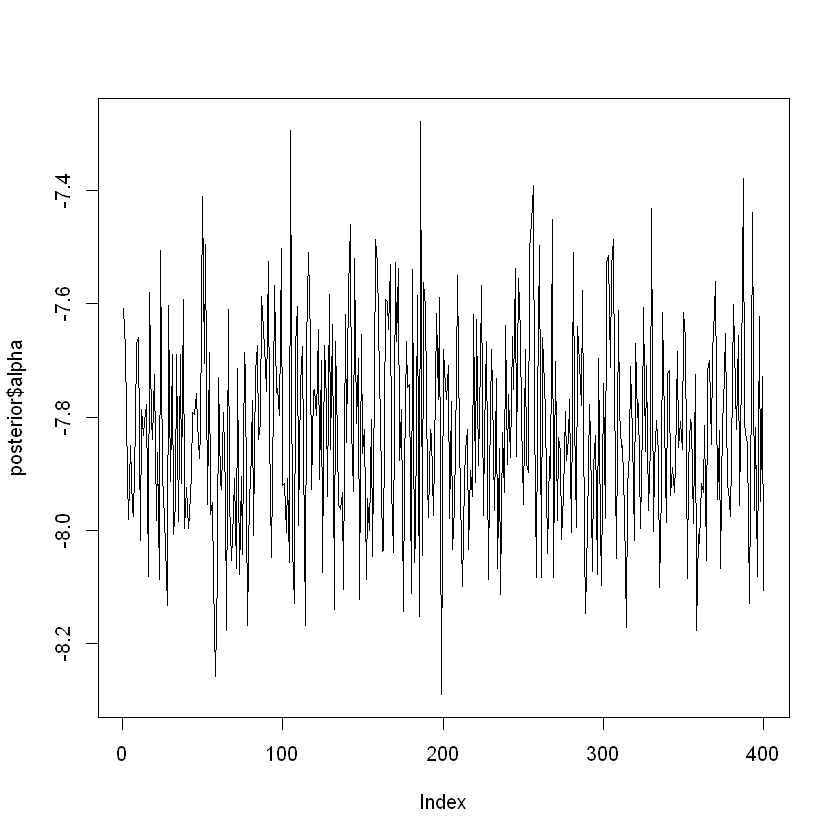

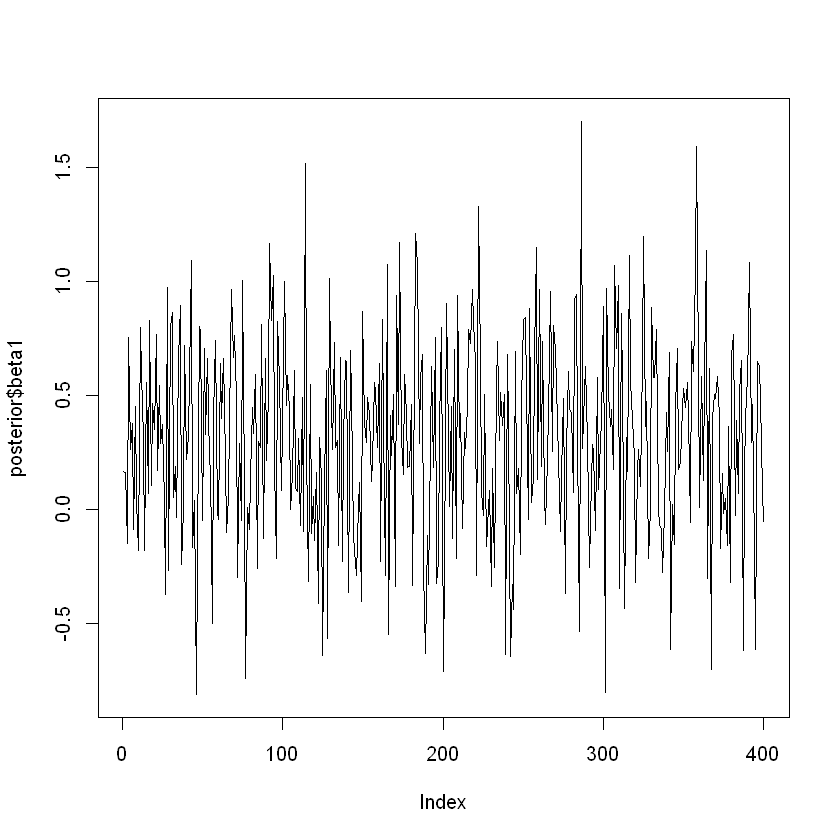

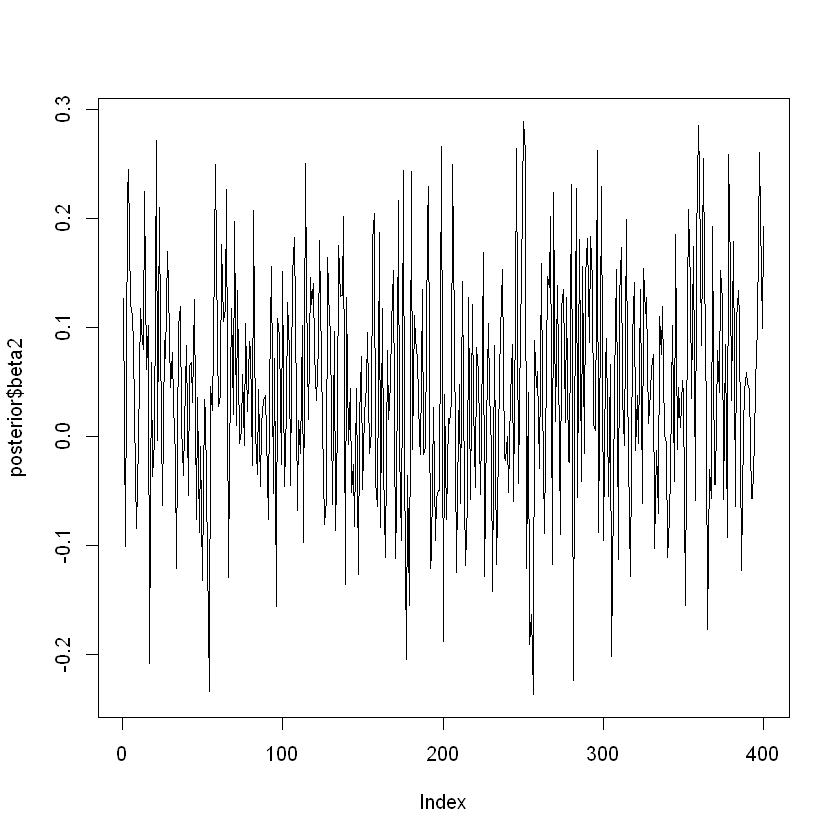

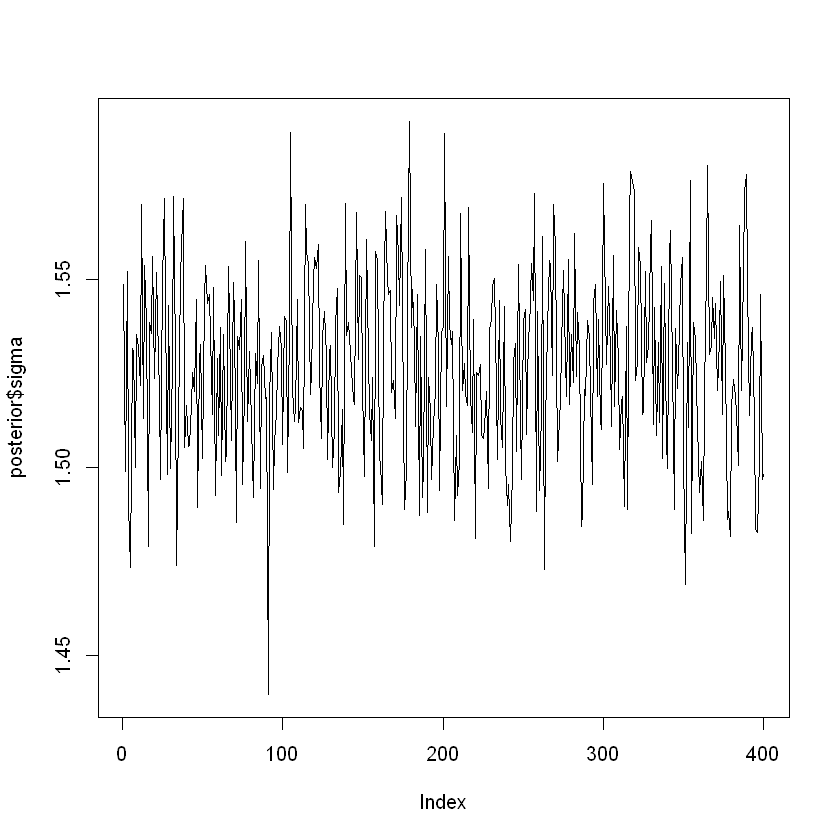

In [38]:
#### Now plot the posterior and other parameter plots:
posterior <- rstan::extract(fit)
plot(posterior$alpha, type = "l")
plot(posterior$beta1, type = "l")
plot(posterior$beta2, type = "l")
plot(posterior$sigma, type = "l")